In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import pickle

In [2]:
# config of inputs
out_dir = 'data'
out_version = 'v0'

In [3]:
df_collection = pickle.load(open( "{}/Xy_collection_{}.pickle".format(out_dir, out_version), "rb" ))

In [4]:
df_collection.keys()

dict_keys(['y_train', 'y_valid', 'X_train_raw', 'X_valid_raw', 'X_test_raw', 'X_train_pca_trunk', 'X_valid_pca_trunk', 'X_test_pca_trunk', 'X_train_pca_mini', 'X_valid_pca_mini', 'X_test_pca_mini', 'X_train_pca_full', 'X_valid_pca_full', 'X_test_pca_full', 'X_train_ica_full', 'X_valid_ica_full', 'X_test_ica_full', 'X_train_ica_mini', 'X_valid_ica_mini', 'X_test_ica_mini', 'X_train_raw_StandardScaler', 'X_valid_raw_StandardScaler', 'X_test_raw_StandardScaler', 'X_train_pca_trunk_StandardScaler', 'X_valid_pca_trunk_StandardScaler', 'X_test_pca_trunk_StandardScaler', 'X_train_pca_mini_StandardScaler', 'X_valid_pca_mini_StandardScaler', 'X_test_pca_mini_StandardScaler', 'X_train_pca_full_StandardScaler', 'X_valid_pca_full_StandardScaler', 'X_test_pca_full_StandardScaler', 'X_train_ica_full_StandardScaler', 'X_valid_ica_full_StandardScaler', 'X_test_ica_full_StandardScaler', 'X_train_ica_mini_StandardScaler', 'X_valid_ica_mini_StandardScaler', 'X_test_ica_mini_StandardScaler', 'X_train_raw_

In [5]:
transforms = [s[len('X_train_'):] for s in  df_collection.keys() if 'X_train' in s]

In [6]:
transforms

['raw',
 'pca_trunk',
 'pca_mini',
 'pca_full',
 'ica_full',
 'ica_mini',
 'raw_StandardScaler',
 'pca_trunk_StandardScaler',
 'pca_mini_StandardScaler',
 'pca_full_StandardScaler',
 'ica_full_StandardScaler',
 'ica_mini_StandardScaler',
 'raw_MinMaxScaler',
 'pca_trunk_MinMaxScaler',
 'pca_mini_MinMaxScaler',
 'pca_full_MinMaxScaler',
 'ica_full_MinMaxScaler',
 'ica_mini_MinMaxScaler']

# Training and Predicting

In [7]:
# Added to suppress warnings from model fiting of type
# DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. 
import warnings
warnings.filterwarnings('ignore', 'The truth value of an empty array is ambiguous. .*')

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [10]:
models = {'knn3': KNeighborsClassifier(n_neighbors=3), 
          'knn5':  KNeighborsClassifier(n_neighbors=5), 
          'knn7':  KNeighborsClassifier(n_neighbors=7),
          'knn10':  KNeighborsClassifier(n_neighbors=10),
          'LogRegL2':  LogisticRegression(penalty='l2', random_state=314),
          'LogRegL1':  LogisticRegression(penalty='l1', random_state=314),
          'RbfSVC': SVC(),
          'LinearSVC' : LinearSVC(),
          'XGB_depth3':  xgb.XGBClassifier(max_depth=3, random_state=314, seed=314, silent=True),
          'XGB_depth5':  xgb.XGBClassifier(max_depth=5, random_state=314, seed=314, silent=True),
          'XGB_depth7':  xgb.XGBClassifier(max_depth=7, random_state=314, seed=314, silent=True),
          'LGB_depth2leaves4':  lgb.LGBMClassifier(max_depth=2, num_leaves=4, random_state=314),
          'LGB_depthINFleaves7':  lgb.LGBMClassifier(max_depth=-1, num_leaves=7, random_state=314),
          'LGB_depth3leaves7':  lgb.LGBMClassifier(max_depth=3, num_leaves=7, random_state=314),
          'LGB_depth5leaves31':  lgb.LGBMClassifier(max_depth=5, num_leaves=31, random_state=314)}

acc_valid_summary = pd.DataFrame(index=models.keys(), columns=transforms, dtype=np.float32)
acc_train_summary = pd.DataFrame(index=models.keys(), columns=transforms, dtype=np.float32)

def benchmarkModels(df_dict, transform_name=''):
    for clf_name, clf in models.items():
        clf.fit(df_dict['X_train_{}'.format(transform_name)], df_dict['y_train'])
        pred = clf.predict(df_dict['X_valid_{}'.format(transform_name)])
        acc_valid_summary.loc[clf_name, transform_name] = accuracy_score(df_dict['y_valid'], 
                                                                         pred)
        acc_train_summary.loc[clf_name, transform_name] = accuracy_score(df_dict['y_train'], 
                                                                         clf.predict(df_dict['X_train_{}'.format(transform_name)]))
        #print('For the classifier {} the accuracy is {}'.format(clf_name,
        #                                                    accuracy_score(y_valid, pred)))

In [16]:
for t_name in transforms:
    print('========== ', t_name,' =====================')
    benchmarkModels(df_collection, t_name)


==========  raw  =====================
==========  pca_trunk  =====================
==========  pca_mini  =====================
==========  pca_full  =====================
==========  ica_full  =====================
==========  ica_mini  =====================
==========  raw_StandardScaler  =====================
==========  pca_trunk_StandardScaler  =====================
==========  pca_mini_StandardScaler  =====================
==========  pca_full_StandardScaler  =====================
==========  ica_full_StandardScaler  =====================
==========  ica_mini_StandardScaler  =====================
==========  raw_MinMaxScaler  =====================
==========  pca_trunk_MinMaxScaler  =====================
==========  pca_mini_MinMaxScaler  =====================
==========  pca_full_MinMaxScaler  =====================
==========  ica_full_MinMaxScaler  =====================
==========  ica_mini_MinMaxScaler  =====================


Text(0.5,1,'Validation sample')

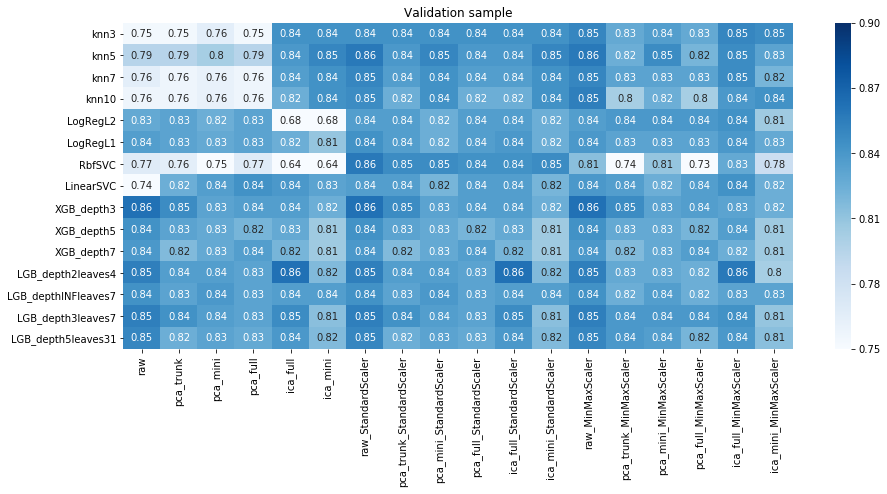

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(acc_valid_summary, cmap='Blues', annot=True, vmin=0.75, vmax=0.9)
plt.title('Validation sample')

Text(0.5,1,'Train sample')

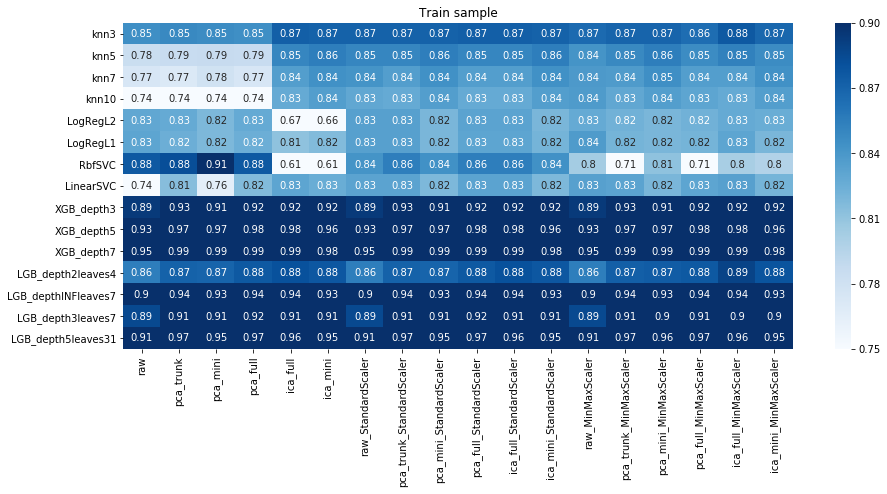

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(acc_train_summary, cmap='Blues', annot=True, vmin=0.75, vmax=0.9)
plt.title('Train sample')